In [34]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import mlab
import scipy.signal as signal
from scipy import stats
import pandas as pd
from scipy import linalg
import os

*MLML Shore Station Data>Moss_Landing>netcdf*
https://drive.google.com/drive/u/3/folders/1kHGUe0LtATtH5veMkt-f35pgTuz2AGWZ

In [98]:
local_dataset_2021='moss_landing_2021.nc'

In [99]:
ds2021=xr.open_dataset(local_dataset_2021)

In [100]:
df=ds2021.to_dataframe()

In [101]:
df

,temp,temp_flg,cond,cond_flg,sal,sal_flg,fluor,fluor_flg,otemp,otemp_flg,...,osat_flg,ph,ph_flg,co2,co2_flg,nitrate,nitrogen,nitrate_flg,lon,lat
time,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:34,12.623983,1.0,0.896977,1.0,33.120840,1.0,7.344685,1.0,12.69,1.0,...,1.0,7.7670,1.0,NaN,4.0,11.02,0.1544,1.0,-121.7915,36.8025
2021-01-01 00:05:35,12.627052,1.0,0.896977,1.0,33.118129,1.0,7.363977,1.0,12.68,1.0,...,1.0,7.7670,1.0,NaN,4.0,10.75,0.1506,1.0,-121.7915,36.8025
2021-01-01 00:10:34,12.620147,1.0,0.896806,1.0,33.117203,1.0,7.363977,1.0,12.68,1.0,...,1.0,7.7760,1.0,NaN,4.0,9.97,0.1396,1.0,-121.7915,36.8025
2021-01-01 00:15:35,12.645462,1.0,0.897221,1.0,33.111905,1.0,7.383269,1.0,12.70,1.0,...,1.0,7.7760,1.0,NaN,4.0,9.10,0.1275,1.0,-121.7915,36.8025
2021-01-01 00:20:34,12.654665,1.0,0.897294,1.0,33.106791,1.0,7.392915,1.0,12.70,1.0,...,1.0,7.7715,1.0,NaN,4.0,9.68,0.1355,1.0,-121.7915,36.8025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-03 12:00:43,11.042915,1.0,0.868913,1.0,33.364048,1.0,9.968372,1.0,NaN,4.0,...,4.0,7.8120,1.0,NaN,4.0,-1.00,-1.0000,4.0,-121.7915,36.8025
2021-04-03 12:05:44,11.032715,1.0,0.868718,1.0,33.365014,1.0,10.479606,3.0,NaN,4.0,...,4.0,7.8075,1.0,NaN,4.0,-1.00,-1.0000,4.0,-121.7915,36.8025
2021-04-03 12:10:43,11.028007,1.0,0.868669,1.0,33.367225,1.0,11.347737,3.0,NaN,4.0,...,4.0,7.7985,1.0,NaN,4.0,-1.00,-1.0000,4.0,-121.7915,36.8025


Text(0.5, 0, 'Year-Month')

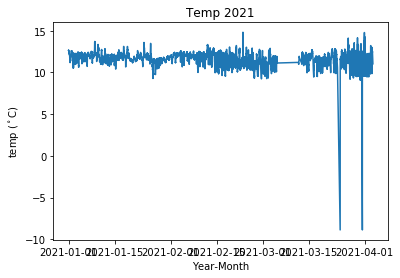

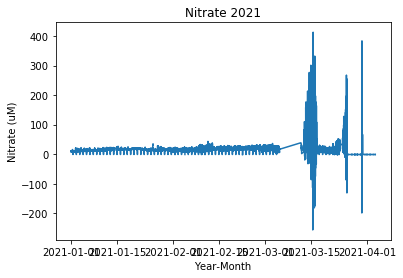

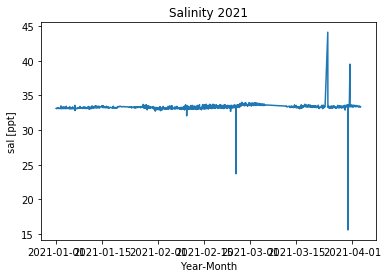

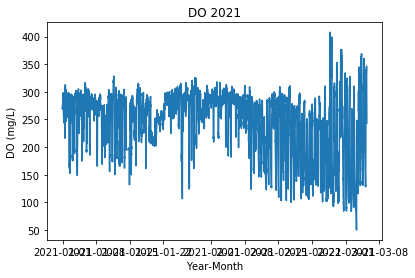

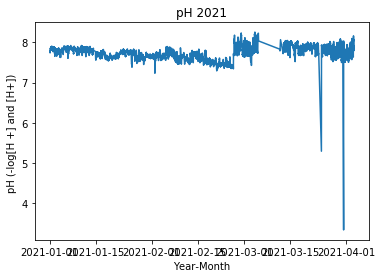

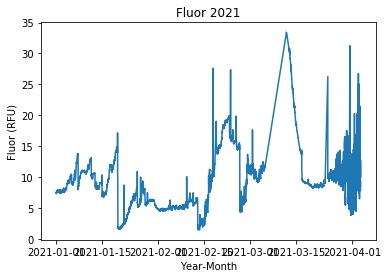

In [90]:
#Temp 2021
plt.figure()
plt.plot(df.index,df['temp'])
plt.title('Temp 2021')
plt.ylabel('temp ($^\circ$C)')
plt.xlabel('Year-Month')

#Nitrate 2021
plt.figure()
plt.plot(df.index,df['nitrate'])
plt.title('Nitrate 2021')
plt.ylabel('Nitrate (uM)')
plt.xlabel('Year-Month')

#Salinity 2021
plt.figure()
plt.plot(df.index,df['sal'])
plt.title('Salinity 2021')
plt.ylabel('sal [ppt]')
plt.xlabel('Year-Month')

#DO 2021
plt.figure()
plt.plot(df.index,df['do2'])
plt.title('DO 2021')
plt.ylabel('DO (mg/L)')
plt.xlabel('Year-Month')

#pH 2021
plt.figure()
plt.plot(df.index,df['ph']) 
plt.title('pH 2021')
plt.ylabel('pH (-log[H +] and [H+]) ') 
plt.xlabel('Year-Month')

#Fluorescence
plt.figure()
plt.plot(df.index,df['fluor']) 
plt.title('Fluor 2021')
plt.ylabel('Fluor (RFU)') 
plt.xlabel('Year-Month')

In [111]:
df=ds2021.to_dataframe()

In [112]:
ii_df=np.array((df['temp_flg'] == 1) & (df['sal_flg'] == 1) & (df['fluor_flg'] == 1) & (df['ph_flg'] == 1) & (df['do2_flg'] == 1) & (df['nitrate_flg'] ==1))

In [113]:
ii_df

array([ True,  True,  True, ..., False, False, False])

In [123]:
temp_df= np.array(df['temp'][ii_df])
nitrate_df = np.array(df['nitrate'][ii_df])
sal_df= np.array(df['sal'][ii_df])
fluor_df= np.array(df['fluor'][ii_df])
pH_df= np.array(df['ph'][ii_df])
do2_df= np.array(df['do2'][ii_df])

In [124]:
#Shape:(16939,)
# np.shape(temp_df)
#np.shape(sal_df)
#np.shape(fluor_df)
#np.shape(pH_df)
#np.shape(do2_df)

In [125]:
PCA_df = pd.DataFrame(temp_df, columns=['temp'])
PCA_df['nitrate'] = nitrate_df.tolist()
PCA_df['sal'] = sal_df.tolist()
PCA_df['fluor'] = fluor_df.tolist()
PCA_df['pH'] = pH_df.tolist()
PCA_df['do2'] = do2_df.tolist()

In [126]:
PCA_df

,temp,nitrate,sal,fluor,pH,do2
0,12.623983,11.02,33.120840,7.344685,7.7670,269.33
1,12.627052,10.75,33.118129,7.363977,7.7670,269.15
2,12.620147,9.97,33.117203,7.363977,7.7760,271.28
3,12.645462,9.10,33.111905,7.383269,7.7760,269.07
4,12.654665,9.68,33.106791,7.392915,7.7715,271.31
...,...,...,...,...,...,...
16934,11.154231,15.81,33.628876,11.608177,8.0460,248.18
16935,11.142480,15.82,33.627171,11.608177,8.0460,247.96
16936,11.133079,15.71,33.629557,11.598531,8.0415,246.29
16937,11.132295,16.63,33.628193,11.579239,8.0415,245.47


In [129]:
R = np.corrcoef(PCA_df, rowvar=False) 

In [130]:
R

array([[ 1.        , -0.67438545, -0.78580541, -0.16448434,  0.16906869,
         0.69734529],
       [-0.67438545,  1.        ,  0.66466539,  0.11782201, -0.47086073,
        -0.84558923],
       [-0.78580541,  0.66466539,  1.        ,  0.1803806 ,  0.00858192,
        -0.69652096],
       [-0.16448434,  0.11782201,  0.1803806 ,  1.        , -0.11903237,
        -0.2093266 ],
       [ 0.16906869, -0.47086073,  0.00858192, -0.11903237,  1.        ,
         0.46865818],
       [ 0.69734529, -0.84558923, -0.69652096, -0.2093266 ,  0.46865818,
         1.        ]])

In [131]:
val, vec = linalg.eig(R)

In [132]:
vec

array([[ 0.46625954, -0.28016289,  0.03330837, -0.76836673,  0.29515738,
         0.15967478],
       [-0.49414129, -0.12703237, -0.16884847, -0.42516915, -0.62762073,
         0.36946011],
       [-0.45200702,  0.44551069,  0.01338151, -0.10601015,  0.6077669 ,
         0.4652011 ],
       [-0.14784086, -0.10696694,  0.97855211, -0.03370556, -0.08350504,
         0.03205875],
       [ 0.23714035,  0.82615698,  0.096999  , -0.31964251, -0.30417885,
        -0.23900667],
       [ 0.50598775,  0.11364189,  0.05682115,  0.33808019, -0.22382109,
         0.75062586]])

In [133]:
val = np.real(val)

In [134]:
np.real(val)
np.sum(val)

5.999999999999999

In [135]:
pctvar = val/np.sum(val)*100

In [136]:
pctvar

array([56.19007405, 18.32621498, 15.87639699,  4.57842086,  2.65715398,
        2.37173914])

In [137]:
A = np.dot(vec, np.diag(val**.5))

In [138]:
A

array([[ 0.85611708, -0.29378027,  0.0325091 , -0.40271892,  0.11785218,
         0.06023451],
       [-0.90731183, -0.13320681, -0.16479678, -0.22284107, -0.25060011,
         0.13937236],
       [-0.82994748,  0.46716483,  0.01306041, -0.05556239,  0.24267276,
         0.17548897],
       [-0.2714563 , -0.11216609,  0.95507078, -0.01766587, -0.03334239,
         0.0120936 ],
       [ 0.43542252,  0.86631252,  0.09467141, -0.16753209, -0.12145433,
        -0.09016108],
       [ 0.92906357,  0.11916547,  0.05545767,  0.17719571, -0.08936861,
         0.28316046]])

In [139]:
print('PC1 loading')
print(A[:,0])
print('temp', 'nitrate', 'sal', 'fluor', 'pH', 'do2')

PC1 loading
[ 0.85611708 -0.90731183 -0.82994748 -0.2714563   0.43542252  0.92906357]
temp nitrate sal fluor pH do2


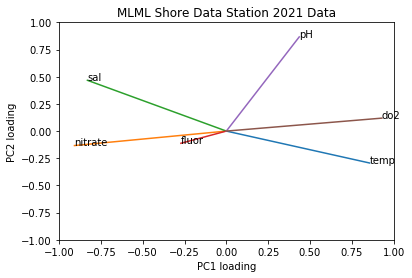

In [140]:
plt.figure
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.title('MLML Shore Data Station 2021 Data')
plt.xlabel('PC1 loading')
plt.ylabel('PC2 loading')

variables = ['temp', 'nitrate', 'sal', 'fluor', 'pH', 'do2']
for i, txt in enumerate (variables):
    plt.plot ([0,A[i,0]], [0, A[i,1]], '-')
    plt.text(A[i,0], A[i,1], txt)

In [142]:
tau = np.dot(PCA_df, vec)
tau
np.shape(tau)

(16939, 6)

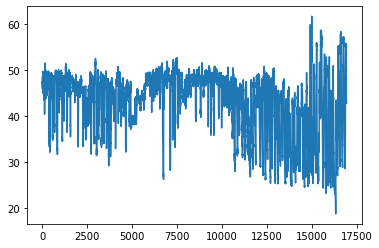

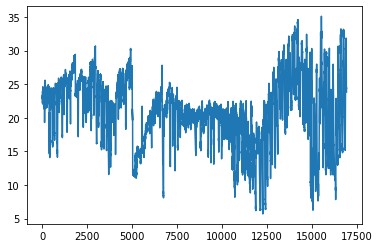

In [144]:
plt.figure()
plt.plot(tau[:,1]) #PC1

plt.figure()
plt.plot(tau[:,2]) #PC2

In [148]:
print(df.head)

<bound method NDFrame.head of                           temp  temp_flg      cond  cond_flg        sal  \
time                                                                      
2021-01-01 00:00:34  12.623983       1.0  0.896977       1.0  33.120840   
2021-01-01 00:05:35  12.627052       1.0  0.896977       1.0  33.118129   
2021-01-01 00:10:34  12.620147       1.0  0.896806       1.0  33.117203   
2021-01-01 00:15:35  12.645462       1.0  0.897221       1.0  33.111905   
2021-01-01 00:20:34  12.654665       1.0  0.897294       1.0  33.106791   
...                        ...       ...       ...       ...        ...   
2021-04-03 12:00:43  11.042915       1.0  0.868913       1.0  33.364048   
2021-04-03 12:05:44  11.032715       1.0  0.868718       1.0  33.365014   
2021-04-03 12:10:43  11.028007       1.0  0.868669       1.0  33.367225   
2021-04-03 12:15:44  11.027222       1.0  0.868620       1.0  33.365855   
2021-04-03 12:20:43  11.027222       1.0  0.868620       1.0  33.36585

Time doesnt work here for some reason 

In [153]:

# plt.figure()
# plt.plot(df['temp'], df['time'])
# plt.ylabel('Temp Degrees C')
# plt.title('Temp 2021')
# plt.xlabel('Year-Month')

Text(0.5, 1.0, '[periodogram, temp for 2021]')

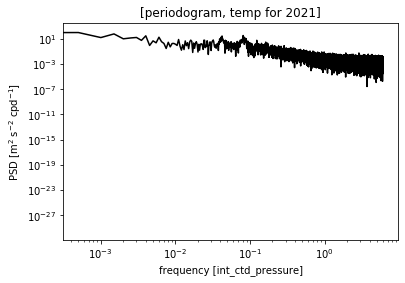

In [161]:
from scipy.signal import periodogram
from scipy.signal import welch

f,S = periodogram(df['temp'],fs=12)
plt.figure()
plt.loglog(f,S,'k-')
plt.xlabel('frequency [int_ctd_pressure]')
plt.ylabel('PSD [m$^2$ s$^{-2}$ cpd$^{-1}$]')
plt.title('[periodogram, temp for 2021]')

In [159]:
N = len(df['temp'])
fs = 12 
fN = 0.5* fs 

In [162]:
df['temp']

time
2021-01-01 00:00:34    12.623983
2021-01-01 00:05:35    12.627052
2021-01-01 00:10:34    12.620147
2021-01-01 00:15:35    12.645462
2021-01-01 00:20:34    12.654665
                         ...    
2021-04-03 12:00:43    11.042915
2021-04-03 12:05:44    11.032715
2021-04-03 12:10:43    11.028007
2021-04-03 12:15:44    11.027222
2021-04-03 12:20:43    11.027222
Name: temp, Length: 23847, dtype: float64

Temp for some reason 'is not defined' evenn though it is defined in the cell above

In [164]:
f, S = welch(temp, fs=48, nperseg=N)

plt.figure()
plt.loglog(f,S)
plt.xlabel('frequency[cpd]')
plt.ylabel('PSD[m$^2$ s$^{-2}$ cpd$^{-1}$]')#variance per unit frequency 
winlen = N/2
f2,S2 = welch(df['temp'], fs=48., nperseg=winlen, window='hanning') 

NameError: name 'temp' is not defined